In [1]:
setwd("/home/victor/OneDrive/Online Courses/MITx 15.071x The Analytics Edge")

In [2]:
wiki = read.csv("Unit5_1/Unit5_1//wiki.csv", stringsAsFactors = FALSE)
wiki$Vandal = as.factor(wiki$Vandal)
str(wiki)

'data.frame':	3876 obs. of  7 variables:
 $ X.1     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Vandal  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Minor   : int  1 1 0 1 1 0 0 0 1 0 ...
 $ Loggedin: int  1 1 1 0 1 1 1 1 1 0 ...
 $ Added   : chr  "  represent psycholinguisticspsycholinguistics orthographyorthography help text all actions through human ethno"| __truncated__ " website external links" " " " afghanistan used iran mostly that farsiis is countries some xmlspacepreservepersian parts tajikestan region" ...
 $ Removed : chr  " " " talklanguagetalk" " regarded as technologytechnologies human first" "  represent psycholinguisticspsycholinguistics orthographyorthography help all actions through ethnologue relat"| __truncated__ ...


In [3]:
table(wiki$Vandal)


   0    1 
2061 1815 

In [4]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [5]:
length(stopwords("english"))

[1] 174

In [6]:
corpusAdded = Corpus(VectorSource(wiki$Added))
corpusAdded

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3876

In [7]:
corpusAdded = tm_map(corpusAdded, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(corpusAdded, removeWords, stopwords("english")):
“transformation drops documents”

In [8]:
corpusAdded = tm_map(corpusAdded, stemDocument)

Warning message in tm_map.SimpleCorpus(corpusAdded, stemDocument):
“transformation drops documents”

In [9]:
dtmAdded = DocumentTermMatrix(corpusAdded)
dtmAdded

<<DocumentTermMatrix (documents: 3876, terms: 6675)>>
Non-/sparse entries: 15368/25856932
Sparsity           : 100%
Maximal term length: 784
Weighting          : term frequency (tf)

In [10]:
sparseAdded = removeSparseTerms(dtmAdded, 0.997)
sparseAdded

<<DocumentTermMatrix (documents: 3876, terms: 166)>>
Non-/sparse entries: 2681/640735
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency (tf)

In [11]:
wordsAdded = as.data.frame(as.matrix(sparseAdded))
colnames(wordsAdded) = paste("A", colnames(wordsAdded))

In [12]:
corpusRemoved = Corpus(VectorSource(wiki$Removed))
corpusRemoved = tm_map(corpusRemoved, removeWords, stopwords("english"))
corpusRemoved = tm_map(corpusRemoved, stemDocument)
dtmRemoved = DocumentTermMatrix(corpusRemoved)
sparseRemoved = removeSparseTerms(dtmRemoved, 0.997)
wordsRemoved = as.data.frame(as.matrix(sparseRemoved))
colnames(wordsRemoved) = paste("R", colnames(wordsRemoved))

Warning message in tm_map.SimpleCorpus(corpusRemoved, removeWords, stopwords("english")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpusRemoved, stemDocument):
“transformation drops documents”

In [13]:
str(wordsRemoved)

'data.frame':	3876 obs. of  162 variables:
 $ R first                       : num  0 0 1 0 0 0 0 0 0 0 ...
 $ R bodi                        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R call                        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R complet                     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R concept                     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R creat                       : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R develop                     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R differ                      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R famili                      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R group                       : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R idea                        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R includ                      : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R linguist                    : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R make                        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R pattern                     : num  0 0 0 1 0 0 0 0 0 0 .

In [14]:
wikiWords = cbind(wordsAdded, wordsRemoved)

In [29]:
wikiWords$Vandal = wiki$Vandal

In [30]:
library(caTools)

In [51]:
set.seed(123)
spl = sample.split(wikiWords$Vandal, 0.7)
wikiTrain = subset(wikiWords, spl == TRUE)
wikiTest = subset(wikiWords, spl == FALSE)
table(wikiTest$Vandal)


  0   1 
618 545 

In [52]:
acc = 618/nrow(wikiTest)
acc

[1] 0.5313844

In [53]:
library(rpart)
library(rpart.plot)

In [54]:
wikiCART = rpart(Vandal ~ ., data = wikiTrain, method="class")

In [55]:
testPredictCART = predict(wikiCART, newdata=wikiTest, type="class")

In [56]:
table(wikiTest$Vandal, testPredictCART)

   testPredictCART
      0   1
  0 614   4
  1 526  19

In [57]:
accCART = (618 + 14)/nrow(wikiTest)
accCART

[1] 0.5434222

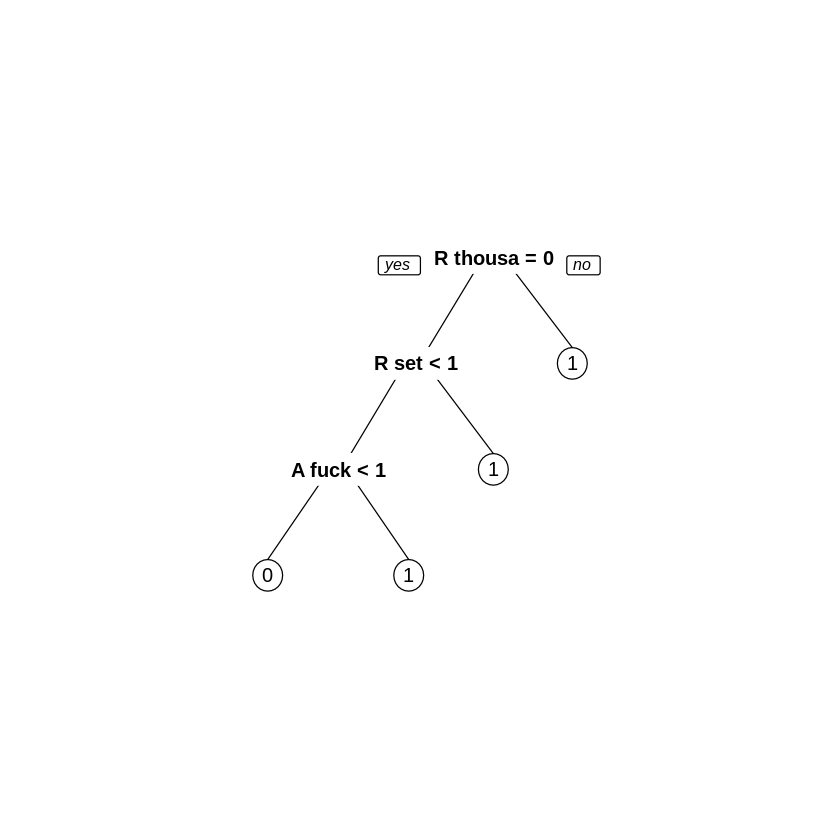

In [58]:
prp(wikiCART)

In [60]:
trainPred = predict(wikiCART, type = "class")
table(wikiTrain$Vandal, trainPred)

   trainPred
       0    1
  0 1443    0
  1 1224   46

In [62]:
accTrain = (1443 + 49)/nrow(wikiTrain)
accTrain

[1] 0.5499447

In [63]:
wikiWords2 = wikiWords

In [64]:
wikiWords2$HTTP = ifelse(grepl("http",wiki$Added,fixed=TRUE), 1, 0)

In [65]:
table(wikiWords2$HTTP)


   0    1 
3659  217 

In [66]:
wikiTrain2 = subset(wikiWords2, spl==TRUE)
wikiTest2 = subset(wikiWords2, spl==FALSE)

In [67]:
wikiCART2 = rpart(Vandal ~. , data = wikiTrain2, method = "class")

In [69]:
testPred = predict(wikiCART2, type = "class", newdata = wikiTest2)
table(wikiTest2$Vandal, testPred)

   testPred
      0   1
  0 605  13
  1 481  64

In [70]:
acc2 = (605 + 64)/nrow(wikiTest2)
acc2

[1] 0.5752365

In [71]:
wikiWords2$NumWordsAdded = rowSums(as.matrix(dtmAdded))
wikiWords2$NumWordsRemoved = rowSums(as.matrix(dtmRemoved))

In [72]:
mean(wikiWords2$NumWordsAdded)

[1] 4.050052

In [90]:
wikiTrain3 = subset(wikiWords2, spl==TRUE)
wikiTest3 = subset(wikiWords2, spl==FALSE)

In [91]:
wikiCART3 = rpart(Vandal ~. , data = wikiTrain3, method = "class")

In [92]:
testPred2 = predict(wikiCART3, type = "class", newdata = wikiTest3)
table(wikiTest3$Vandal, testPred2)

   testPred2
      0   1
  0 514 104
  1 297 248

In [93]:
acc3 = (514 + 248)/nrow(wikiTest3)
acc3

[1] 0.6552021

In [94]:
wikiWords3 = wikiWords2

In [95]:
wikiWords3$Minor = wiki$Minor
wikiWords3$Loggedin = wiki$Loggedin

In [96]:
wikiTrain4 = subset(wikiWords3, spl==TRUE)
wikiTest4 = subset(wikiWords3, spl==FALSE)

In [97]:
wikiCART4 = rpart(Vandal ~. , data = wikiTrain4, method = "class")

In [103]:
testPred3 = predict(wikiCART4, type = "class", newdata = wikiTest4)
table(wikiTest4$Vandal, testPred3)

   testPred3
      0   1
  0 595  23
  1 304 241

In [104]:
acc4 = (595 + 241)/nrow(wikiTest4)
acc4

[1] 0.7188306

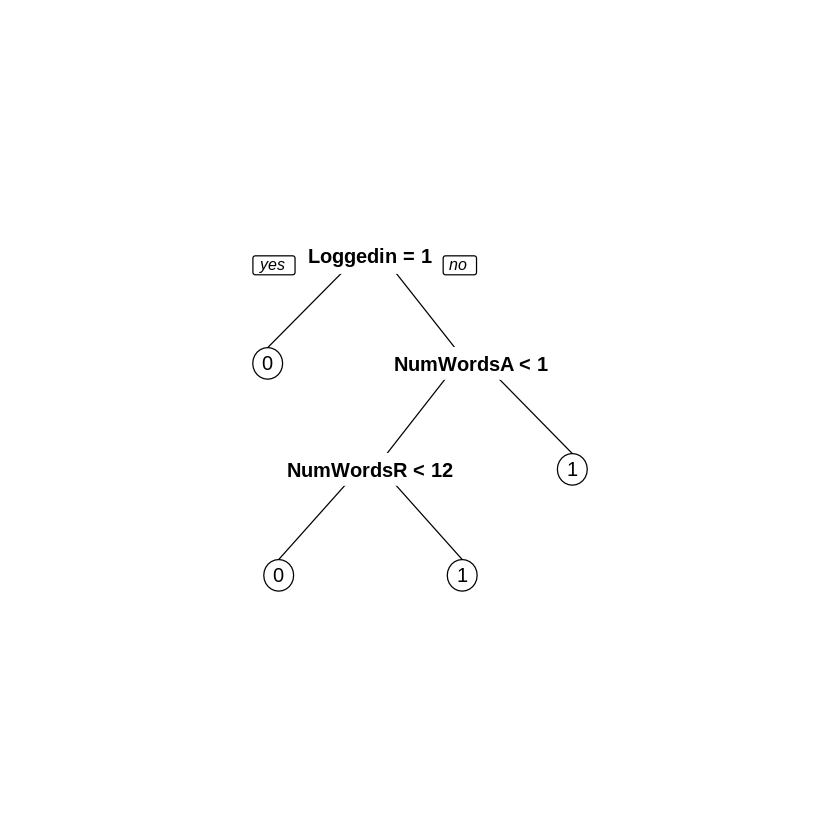

In [105]:
prp(wikiCART4)